In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator


In [8]:
# loading data from log file
f=open('say.txt', encoding='gbk')
txts=[]
for line in f:
    data = line.strip()
    if data[0:13] == "[drone debug]":
        txts.append(data[14:])
#         print(data[14:])

In [9]:
phi = []
p = []
say = []

say_x = []
say_y = []

for txt in txts:
    oneline = txt.split(':')
    if oneline[0] == "phi":
        phi.append((float(oneline[1]))) 
    elif oneline[0] == "p":
        p.append((float(oneline[1]))) 
    elif oneline[0] == "say":
        say.append((float(oneline[1]))) 
    elif oneline[0] == "x":
        say_x.append((float(oneline[1]))) 
    elif oneline[0] == "y":
        say_y.append((float(oneline[1])))    
        
print(len(phi))
print(len(p))
print(len(say))
print(len(say_x))
print(len(say_y))

5517
5520
5522
0
0


In [10]:
t = np.arange(0, 0.003333*(len(phi)-1), 0.003333)

print(len(t))

5516


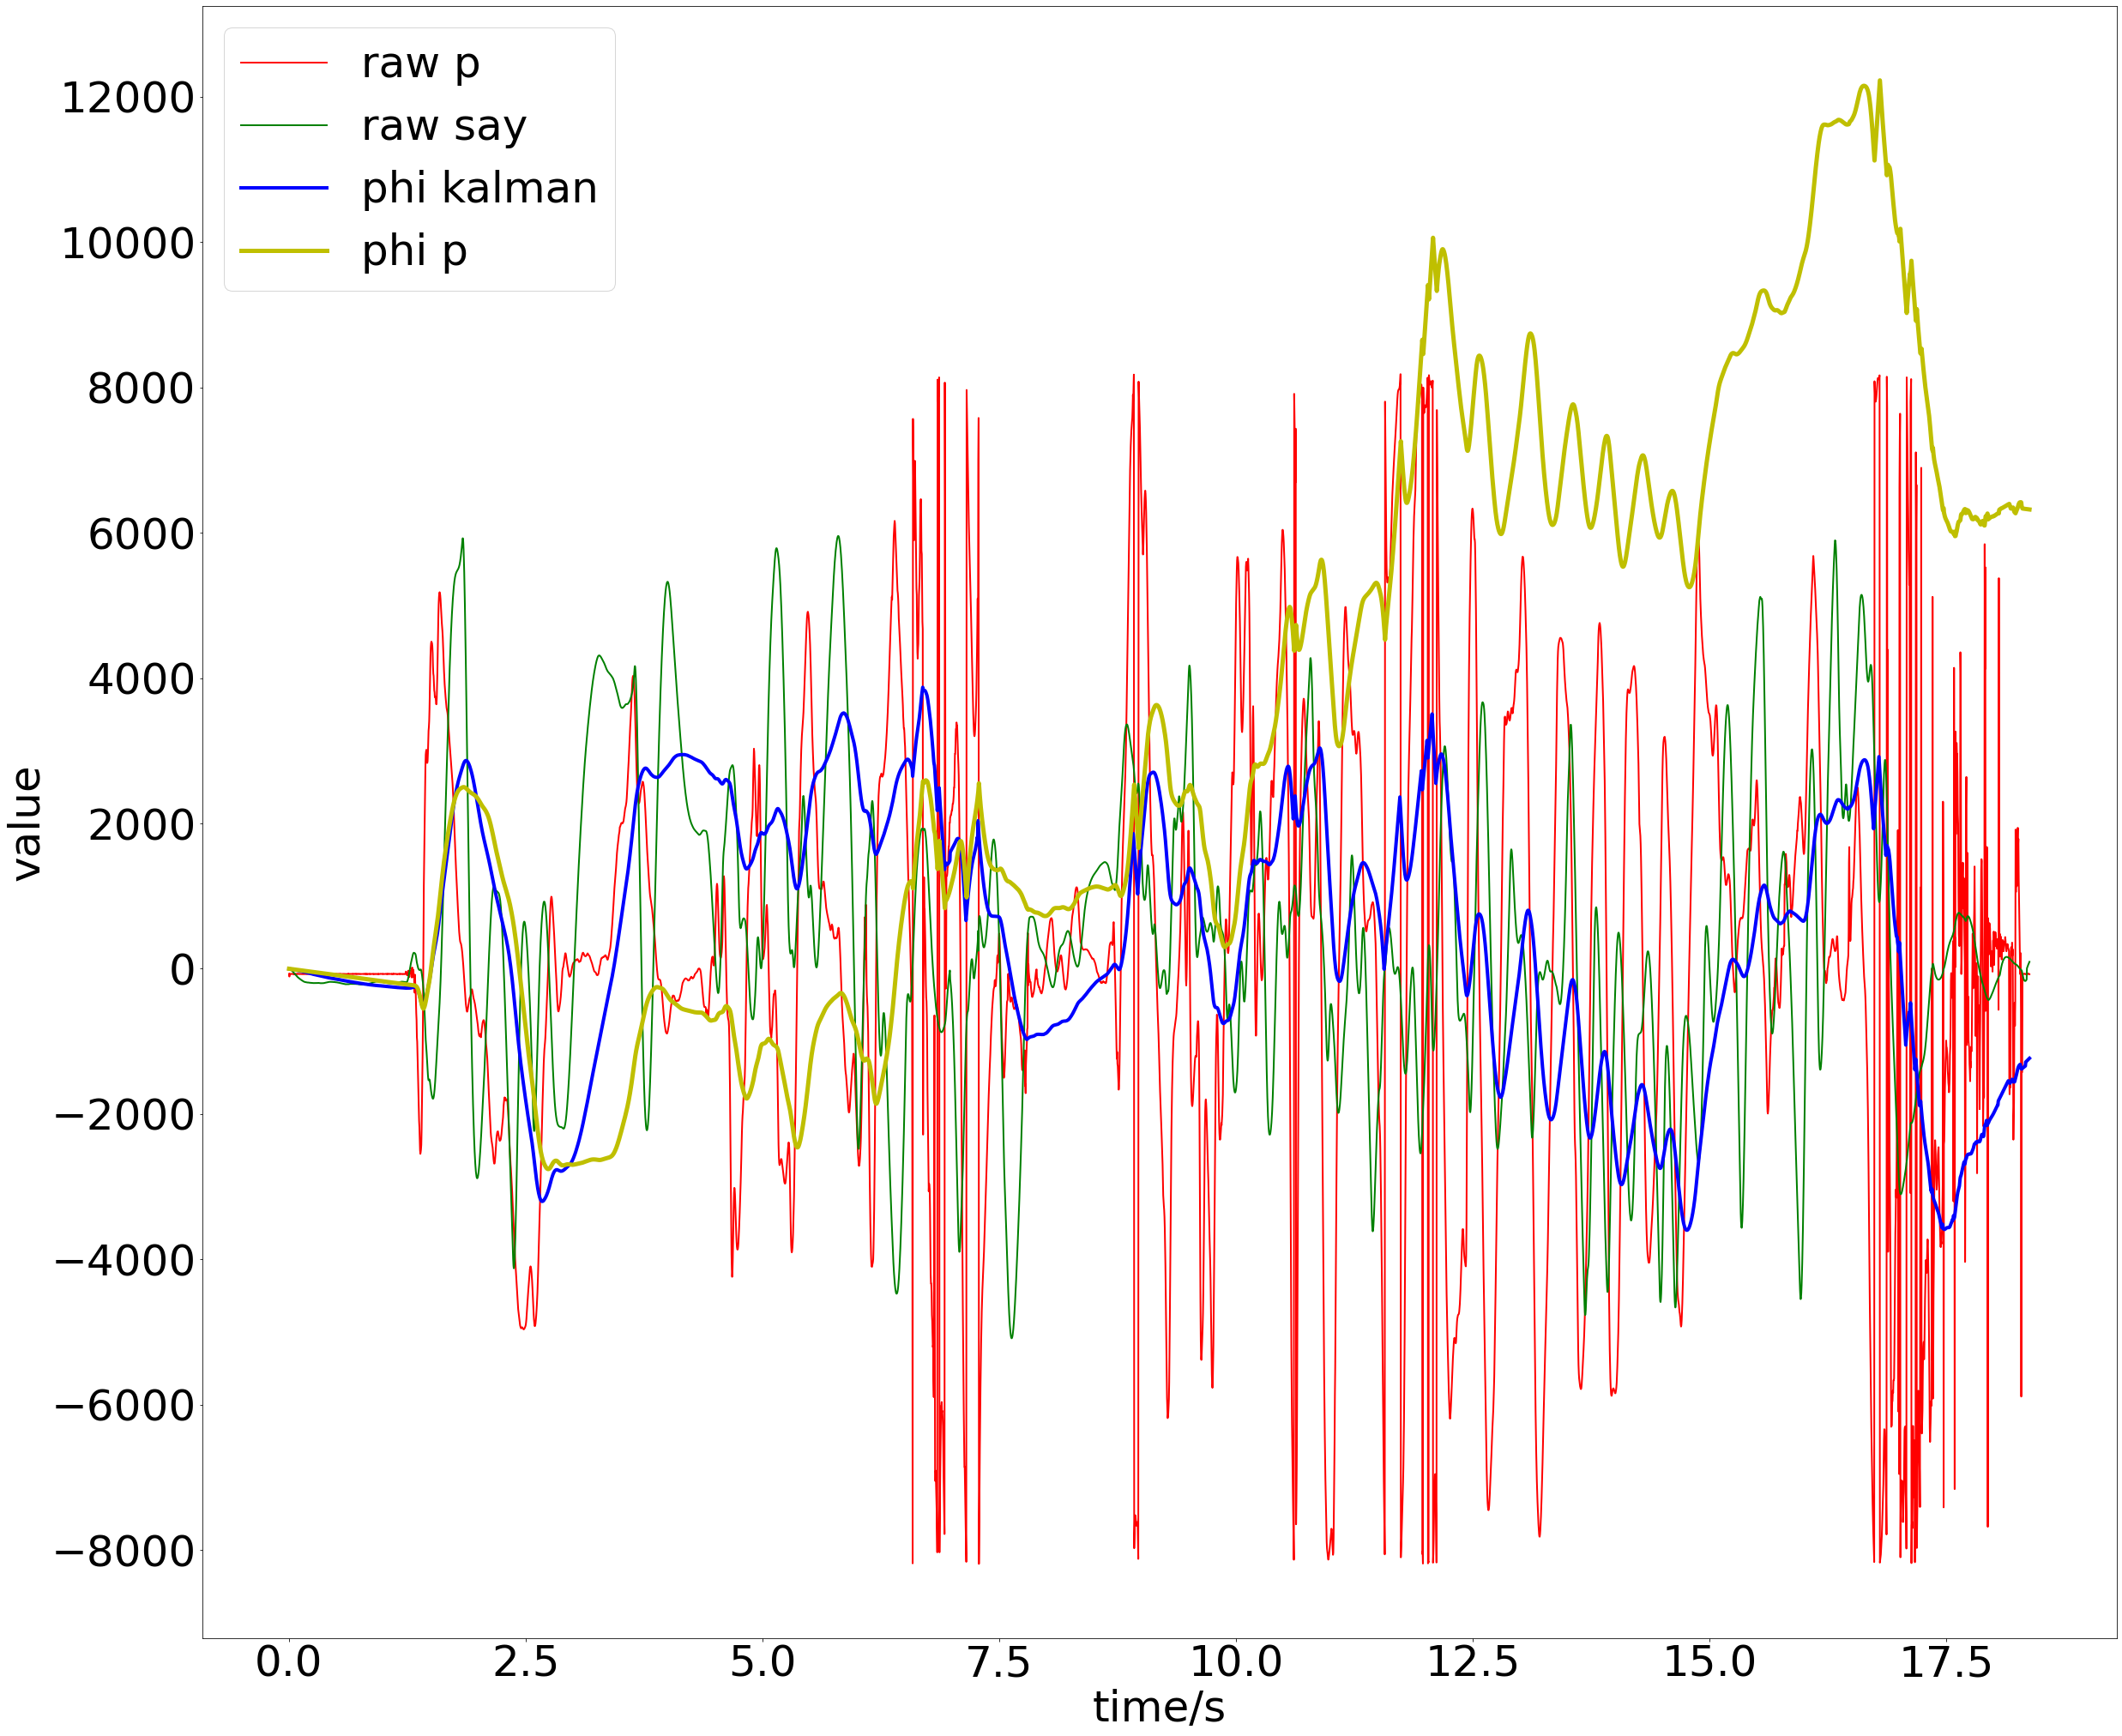

In [38]:
plt.figure(figsize=(40,35))

y_major_locator=MultipleLocator(2000)

ax=plt.gca()

ax.yaxis.set_major_locator(y_major_locator)

plt.tick_params(axis='both',which='major',labelsize=50)
plt.xlabel('time/s',fontsize=50)
plt.ylabel('value',fontsize=50)

plt.plot(t,p[0:len(t)], 'r', linewidth=2, label="raw p")
plt.plot(t,say[0:len(t)], 'g', linewidth=2, label="raw say")
plt.plot(t,phi[0:len(t)], 'b', linewidth=4, label="phi kalman")
plt.plot(t,phi_p[0:len(t)], 'y', linewidth=5, label="phi p")

plt.legend(loc="upper left", prop={'size': 50})
plt.show()


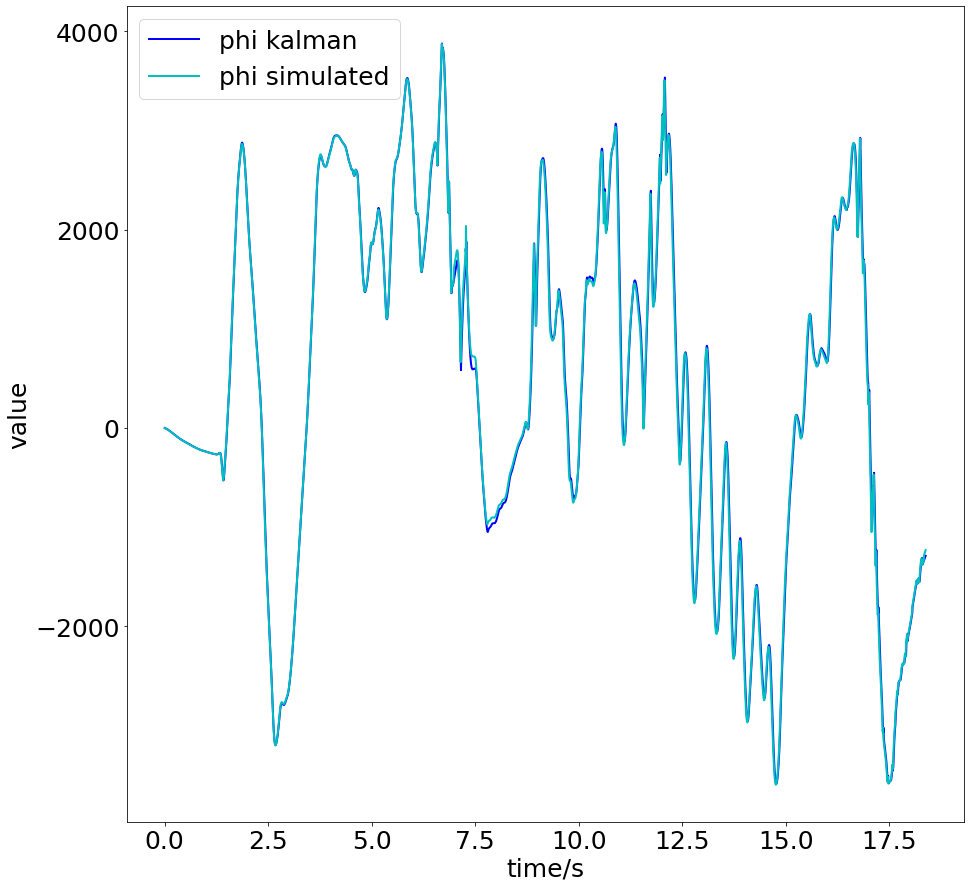

In [27]:
# simulate Kalman
p2phi = 0.0081
C1 = 256;
C2 = 1250*C1;

p_kalman = []
phi_error = []
p_bias = []
phi_kalman = []

kalman = 0.0

for i in range(0,len(t)):
    if i == 0:
        p_kalman.append((float(p[0])))
        p_bias.append(0.0)
        phi_error.append(0.0)
        phi_kalman.append(0.0)
    else:     
        p_kalman.append(p[i-1] - p_bias[i-1])
        kalman = (phi_kalman[i-1] + p_kalman[i] * p2phi)
        phi_error.append(kalman - say[i])
        phi_kalman.append(kalman - phi_error[i] / C1)
        p_bias.append(p_bias[i-1] + (phi_error[i]/p2phi) / C2)        
#         p_kalman[i] = p[i-1] - p_bias[i-1]
#         phi_kalman[i]= phi_kalman[i-1] + p_kalman[i] * p2phi
#         phi_error[i]= phi_kalman[i] - say[i]
#         phi_kalman[i]= phi_kalman[i] - phi_error[i] / C1
#         p_bias[i]= p_bias[i-1] + (phi_error[i]/p2phi) / C2

phi_p = [0.0]

for i in range(1,len(t)):
    phi_p.append(phi_p[i-1] + p[i-1] * p2phi)
    
    
plt.figure(figsize=(15,15))

y_major_locator=MultipleLocator(2000)

ax=plt.gca()

ax.yaxis.set_major_locator(y_major_locator)

plt.tick_params(axis='both',which='major',labelsize=25)
plt.xlabel('time/s',fontsize=25)
plt.ylabel('value',fontsize=25)

# plt.plot(t,p[0:len(t)], 'r', linewidth=4, label="raw p")
plt.plot(t,phi_kalman[0:len(t)], 'b', linewidth=2, label="phi kalman")
# plt.plot(t,phi_p[0:len(t)], 'y', linewidth=4, label="phi p")
plt.plot(t,phi[0:len(t)], 'c', linewidth=2, label="phi simulated")
# plt.plot(t,say[0:len(t)], 'g', linewidth=4, label="raw say")
plt.legend(loc="upper left", prop={'size': 25})
plt.show()    

In [57]:
# plt.figure(figsize=(50,50))

# y_major_locator=MultipleLocator(2000)

# ax=plt.gca()

# ax.yaxis.set_major_locator(y_major_locator)

# plt.tick_params(axis='both',which='major',labelsize=40)
# plt.xlabel('Numbers',fontsize=40)

# plt.plot(t,phi_kalman[0:len(t)], 'b')
# plt.plot(t,phi[0:len(t)], 'r')

# plt.show()